<a href="https://colab.research.google.com/github/mahdihammi/Weather-Forecast/blob/main/Temp_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import os

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('./gdrive/MyDrive/weather_temp.csv',delimiter = ';')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
df.shape

(1825, 6)

In [ ]:
df.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1825.000000,1825.000000
mean,38.637013,54.515102,46.818781,607.074521,1823.002740
std,3.798284,5.013654,4.143192,40.797585,49.555065
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


In [ ]:
df.isnull().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True ) 


In [ ]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [ ]:
df = df[['DATE','AvgTemp']]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [ ]:
# changing the cols for the prophet library
df.columns = ['ds','y']
df.head()

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


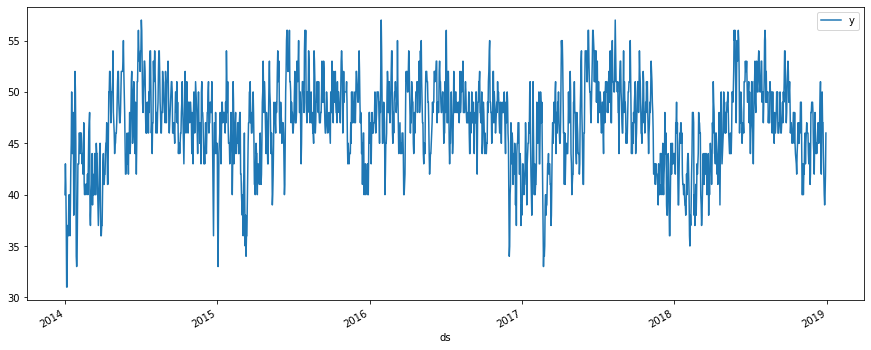

In [ ]:
df.plot(x='ds',y='y',figsize = (15,6))

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536147 sha256=3a0796ceb37088fb4297e30741360f6dbb8b4aa16d918636e3902f5430127df1
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [ ]:
df.shape

(1821, 2)

In [ ]:
train = df[:len(df) - 365]
test = df[len(df)-365:]

print(train.shape, test.shape)

(1456, 2) (365, 2)


## Using 80% trainng and 20% testing 

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2018-12-26,46.210356,36.782063,46.061926,44.679738,47.765542,-4.895626,-4.895626,-4.895626,-0.052657,-0.052657,-0.052657,-4.842969,-4.842969,-4.842969,0.0,0.0,0.0,41.314730
361,2018-12-27,46.209637,37.053582,46.131919,44.671605,47.768010,-4.763894,-4.763894,-4.763894,0.098670,0.098670,0.098670,-4.862564,-4.862564,-4.862564,0.0,0.0,0.0,41.445743
362,2018-12-28,46.208918,37.304088,46.439514,44.663472,47.770325,-4.426654,-4.426654,-4.426654,0.426885,0.426885,0.426885,-4.853539,-4.853539,-4.853539,0.0,0.0,0.0,41.782265
363,2018-12-29,46.208200,37.023041,46.024573,44.655384,47.778613,-4.821508,-4.821508,-4.821508,-0.005508,-0.005508,-0.005508,-4.816000,-4.816000,-4.816000,0.0,0.0,0.0,41.386692
364,2018-12-30,46.207481,36.566977,45.886526,44.647300,47.787372,-4.989863,-4.989863,-4.989863,-0.239327,-0.239327,-0.239327,-4.750536,-4.750536,-4.750536,0.0,0.0,0.0,41.217618


In [ ]:
future.tail()

,ds
1816,2018-12-25
1817,2018-12-26
1818,2018-12-27
1819,2018-12-28
1820,2018-12-29


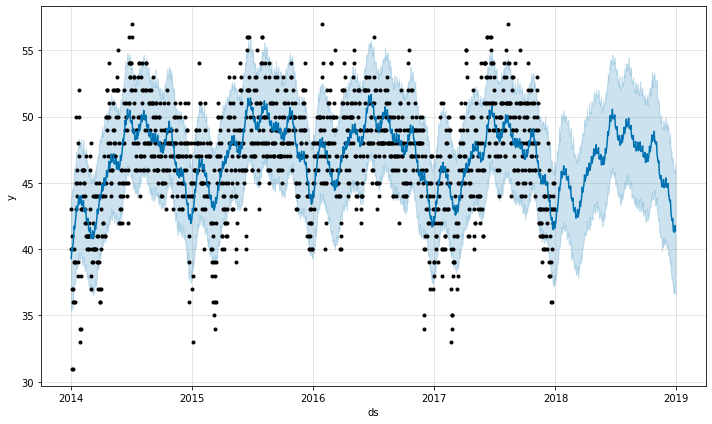

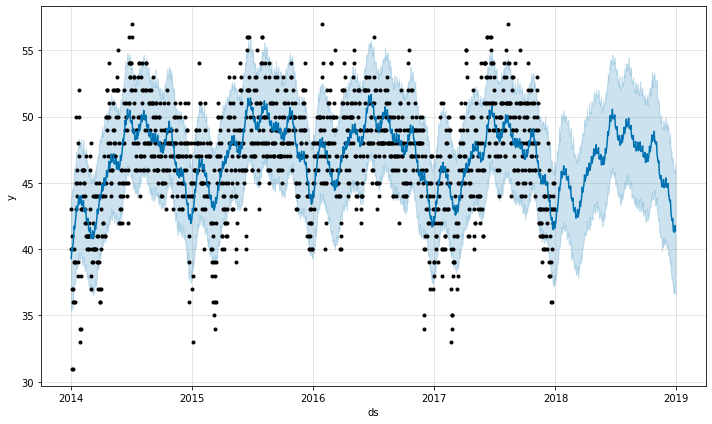

In [ ]:
model.plot(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(model,forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
pred = model.predict(test)

In [ ]:
predictions = forecast.iloc[-365:]['yhat']
predictions

0      41.734372
1      41.598676
2      41.878963
3      41.961183
4      42.221190
         ...    
360    41.314730
361    41.445743
362    41.782265
363    41.386692
364    41.217618
Name: yhat, Length: 365, dtype: float64

In [ ]:
print("RMSE between actual vals and predicted: ",rmse(predictions,test['y']))

RMSE between actual vals and predicted:  3.4619651582901967
